# Predictive Analytics : People Personal Types  


![Types Of Personality](https://i.pinimg.com/736x/0b/17/f4/0b17f428ef7d798e5c8b4e7f4c547237.jpg)

## Business Understanding

### Problem Statements

Berdasarkan latar belakang yang telah diuraikan, maka rumusan masalah dalam penelitian ini adalah sebagai berikut:

- Fitur apa yang paling berpengaruh terhadap tipe kepribadian seseorang?

- Model machine learning apa yang paling efektif dalam mengklasifikasikan tipe kepribadian individu?

### Goals
tujuan untuk menyelesaikan permasalahan diatas adalah:

- Mengidentifikasi fitur-fitur yang memiliki korelasi paling signifikan terhadap tipe kepribadian.

- Membangun model machine learning yang mampu mengklasifikasikan tipe kepribadian secara akurat berdasarkan fitur-fitur yang tersedia dalam dataset.

### Solution statements

Untuk mencapai tujuan tersebut, solusi yang diusulkan dalam penelitian ini mencakup langkah-langkah berikut:

- Melakukan eksplorasi data (exploratory data analysis) dan visualisasi data guna memahami distribusi, karakteristik data, serta mengidentifikasi korelasi antar fitur dan hubungannya dengan variabel target, yaitu tipe kepribadian.

- Mengimplementasikan berbagai algoritma machine learning untuk membangun model klasifikasi dan mengevaluasi kinerjanya.

- Melakukan evaluasi secara komprehensif terhadap kinerja model-model tersebut, serta membandingkan performanya berdasarkan metrik evaluasi pada data pengujian untuk menentukan model terbaik.



### Metodelogi

Klasifikasi tipe kepribadian individu merupakan tujuan utama dalam proyek ini. Tipe kepribadian, dalam konteks ini, merupakan variabel kategorikal tetap (constant) yang terdiri dari beberapa kelas berdasarkan tipe MBTI (seperti INTP, ENFJ, ISTJ, dan sebagainya).

Dalam pendekatan predictive analytics, ketika target yang ingin diprediksi berupa variabel kategorikal, maka permasalahan yang dihadapi dikategorikan sebagai permasalahan klasifikasi. Oleh karena itu, metodologi yang diterapkan dalam proyek ini berfokus pada pembangunan model klasifikasi dengan tipe kepribadian sebagai variabel target.

Model klasifikasi yang akan dikembangkan bertujuan untuk memetakan hubungan antara sejumlah fitur independen — seperti skor dimensi MBTI (Introversion, Sensing, Thinking, Judging), data demografis (usia, jenis kelamin, tingkat pendidikan), serta minat (interest) — terhadap tipe kepribadian seseorang. Proses ini mencakup tahapan praproses data, eksplorasi data, pembangunan dan pelatihan model, serta evaluasi performa model menggunakan metrik klasifikasi.

### Metric

Untuk mengevaluasi kinerja model klasifikasi dalam memprediksi tipe kepribadian berdasarkan fitur-fitur yang tersedia, digunakan metrik utama klasifikasi, yaitu Accuracy, Metrik ini digunakan untuk menilai seberapa baik model dalam membedakan kelas target secara akurat.

## Data Understanding

Tahapan untuk memahami dataset secara mendalam

### Data Loading

tahapan untuk memuat dataset yang akan digunakan.

<br>


**Datasets Information**


| Jenis | Keterangan |
| ------ | ------ |
| Title | Predict People Personality Types |
| Source | [Kaggle](https://www.kaggle.com/datasets/stealthtechnologies/predict-people-personality-types) |
| Owner | [Umair Zia](https://www.kaggle.com/stealthtechnologies) |
| License | MIT |
| Tags | Education, Demographics, Social Science, Beginner
| Usability | 10.00 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install gdown

!gdown --folder https://drive.google.com/drive/folders/1Xm6bS7ofcXTQa2iJcXE4q7Nj70AytI1I?usp=sharing

Retrieving folder contents
Processing file 1StggmG7DU_bsbAj0oeniFsZBZlmREbbm personalilty_classification.csv
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1StggmG7DU_bsbAj0oeniFsZBZlmREbbm
To: /content/submission/personalilty_classification.csv
100% 3.38M/3.38M [00:00<00:00, 33.2MB/s]
Download completed


In [3]:
path = '/content/submission/personalilty_classification.csv'

In [4]:
df = pd.read_csv(path)
df

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP
...,...,...,...,...,...,...,...,...,...
43739,26.0,Male,1,8.88656,5.118399,8.48784,5.331942,Arts,ENTP
43740,29.0,Male,0,2.71470,6.851956,0.25519,3.623678,Unknown,ISFP
43741,25.0,Female,0,2.00982,6.544036,6.63911,6.201555,Technology,ISTJ
43742,23.0,Male,0,7.23553,4.876780,2.41671,4.654016,Arts,ENFP


dari output diatas kita dapat tahu bahwa terdapat 43744 baris dan 9 kolom pada dataset

### Exploratory Data Analysis

#### Deskripsi Variabel

- Age: Usia
- Gender: Jenis kelamin
- Education: Tingkat pendidikan
    - Education = 1 → Minimal lulusan sarjana (graduate-level atau lebih tinggi)
    - Education = 0 → Lulusan di bawah sarjana (undergraduate, SMA, atau tidak berpendidikan)
- Introversion Score: Skor kecenderungan introvert
- Sensing Score	Skor: kecenderungan sensing
- Thinking Score: Skor kecenderungan berpikir
- Judging Score: Skor kecenderungan menilai
- Interest: Minat pribadi (misalnya: Arts, Sports, Others)
- Personality: Tipe kepribadian MBTI

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  float64
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ MB


Dari output diatas dapat diketahui bahwa terdapat:

- 1 kolom integer
- 3 kolom object
- 5 kolom float

In [6]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,43744.000000,43744.000000,43744.000000,43744.000000,43744.000000,43744.000000
mean,27.437203,0.229014,4.588349,5.780074,5.419131,5.391041
std,4.893805,0.420203,2.902628,1.241648,2.900785,1.442413
min,18.000000,0.000000,0.000150,0.000000,0.000320,0.000000
25%,24.000000,0.000000,2.067020,4.953340,2.895750,4.511842
50%,27.000000,0.000000,4.261680,6.162928,5.769870,5.771635
75%,30.000000,0.000000,7.085002,6.622978,7.923503,6.409583
max,52.000000,1.000000,9.999920,9.803837,9.999770,10.000000


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

In [7]:
df.shape

(43744, 9)

Dari Output diatas didapat informasi:
<br>

| Jumlah Baris | Jumlah Kolom |
| ------ | ------ |
| 43744 | 9 |


<br>

#### Menangani Duplikat, Missing Value dan Outliers

In [8]:
df_clean = df.copy()

In [9]:
df_clean['Age'] = df_clean['Age'].astype(int)

In [10]:
duplicated = df_clean.duplicated().sum()
print(f"jumlah data duplikat : {duplicated}")

jumlah data duplikat : 1028


dari output diatas dapat diketahui terdapat 1028 duplikat pada dataset

In [11]:
df_clean.drop_duplicates(inplace=True)

code ini berfungsi untuk menghapus duplikat

In [12]:
df_clean.isna().sum()

,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


In [13]:
missing_value = df_clean.isna().sum()
print(missing_value)
print(f"Total remaining missing values: {missing_value.sum()}")

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64
Total remaining missing values: 0


dari output ini tidak terdapat missing value

In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42716 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 42716 non-null  int64  
 1   Gender              42716 non-null  object 
 2   Education           42716 non-null  int64  
 3   Introversion Score  42716 non-null  float64
 4   Sensing Score       42716 non-null  float64
 5   Thinking Score      42716 non-null  float64
 6   Judging Score       42716 non-null  float64
 7   Interest            42716 non-null  object 
 8   Personality         42716 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 3.3+ MB


In [15]:
df_clean.head(5)

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


**Menangani Outlier**

In [16]:
outliers=['Age','Introversion Score','Sensing Score','Thinking Score','Judging Score']

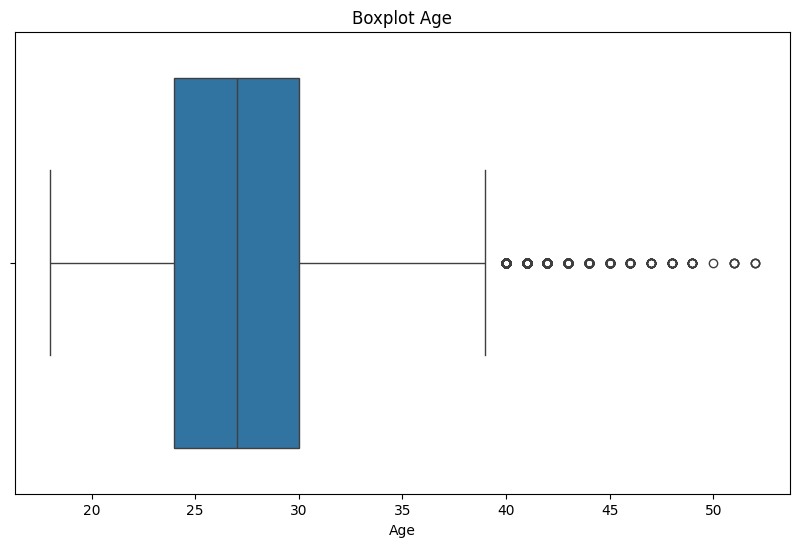

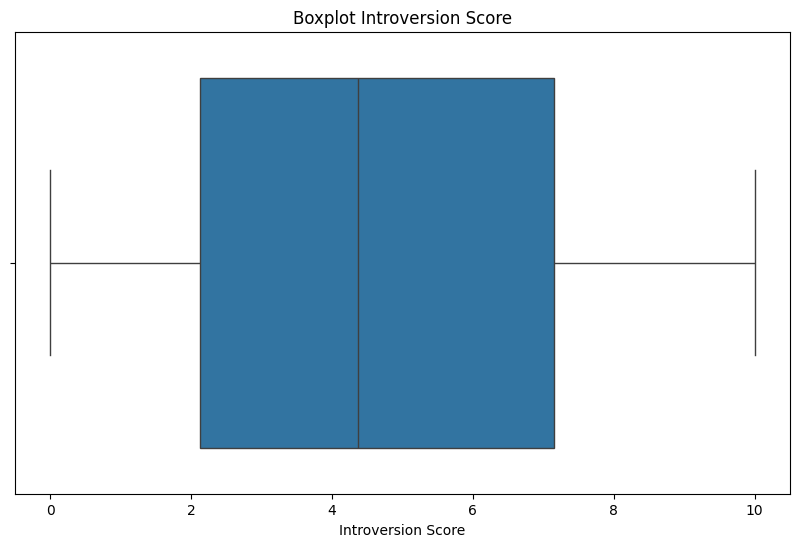

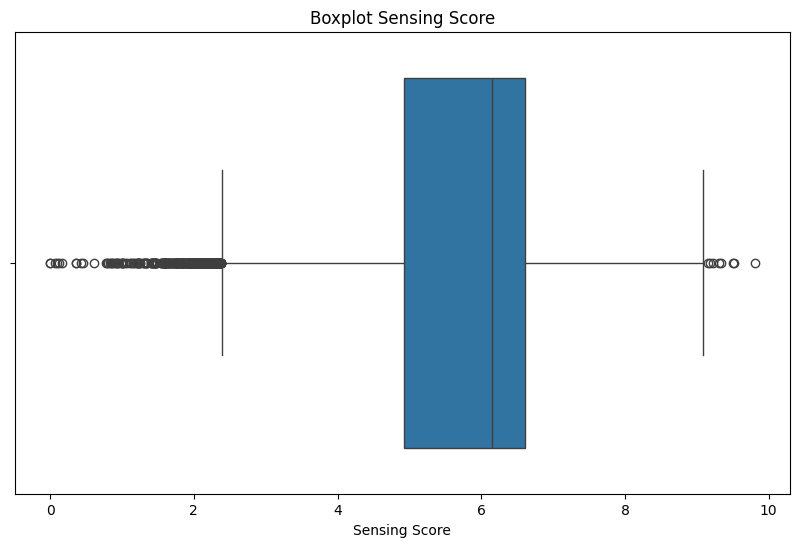

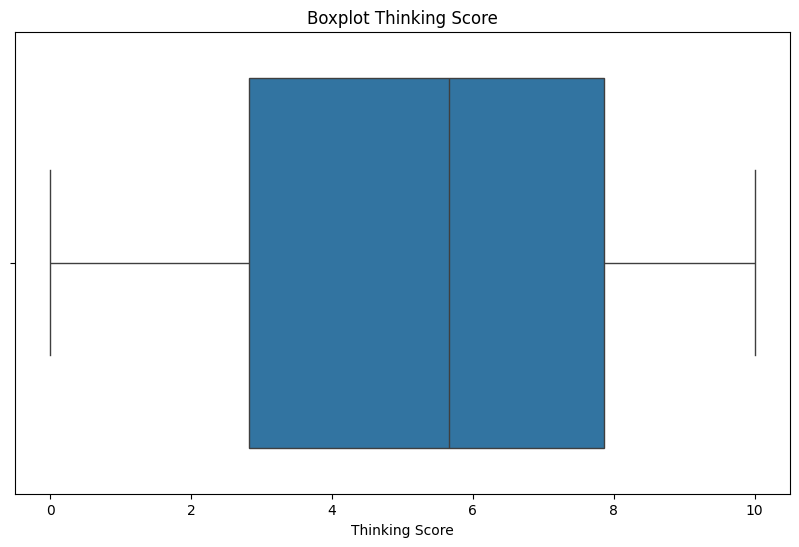

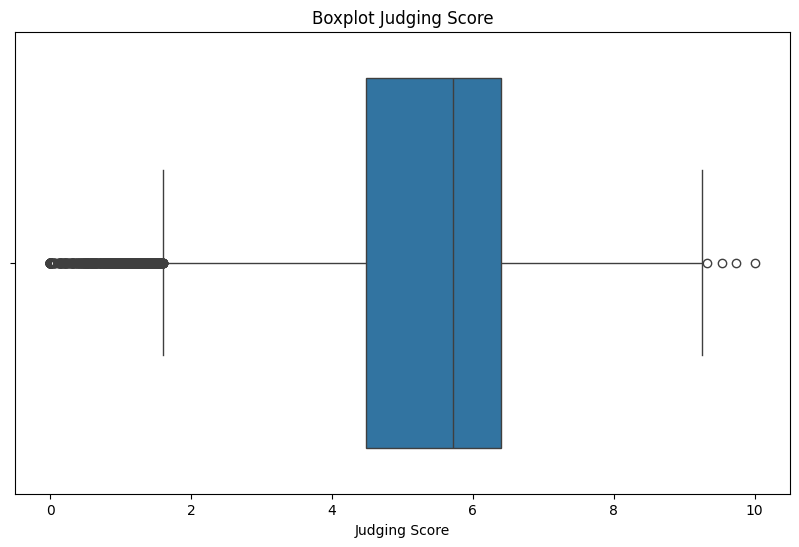

In [17]:
for num in outliers:
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df_clean, x=num)
  plt.title(f'Boxplot {num}')
  plt.show()

dari boxplot dapat diketahui terdapat beberapa kolom dengan outlier, penggunaan teknik menganti nilai luar dengan batas atas dan bawah dapat digunakan untuk mengganti nilai outlier menjadi nilai batas atas dan batas bawah data

In [18]:
# Fungsi untuk menangani outlier
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti nilai di luar batas dengan batas atas atau bawah
    data[column] = data[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )

# Iterasi untuk semua kolom
for col in outliers:
    if col in df_clean.columns:
        handle_outliers(df_clean, col)

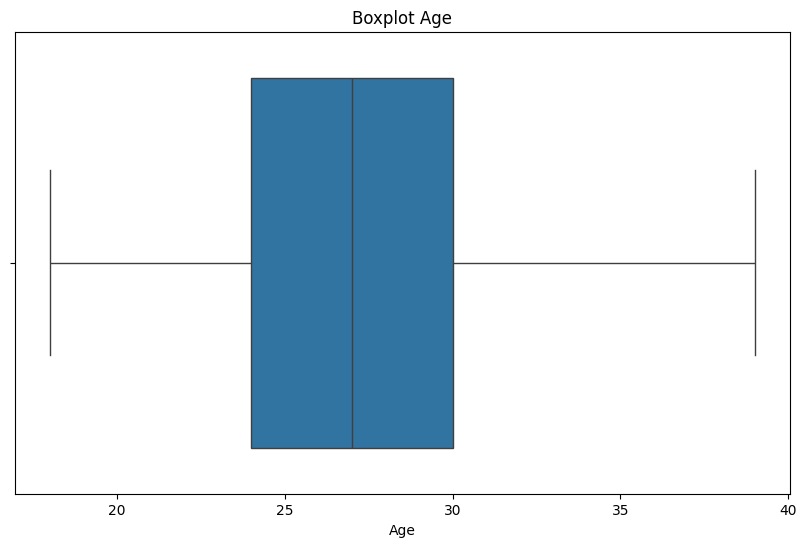

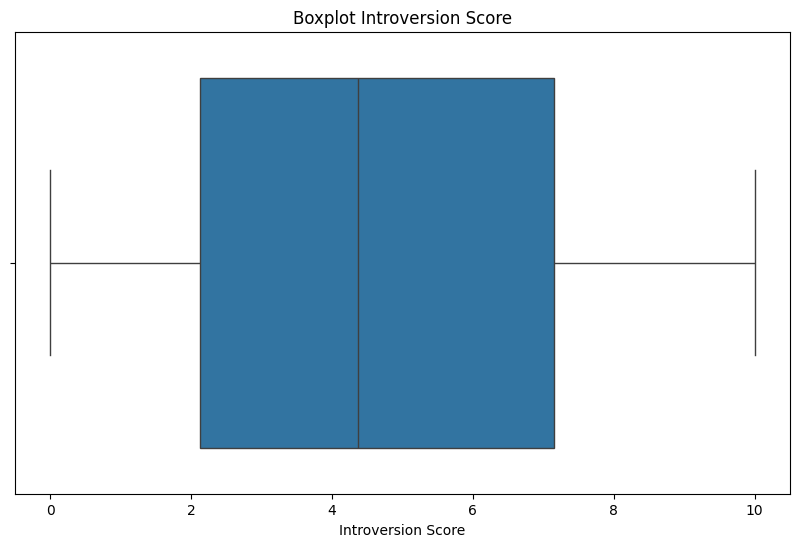

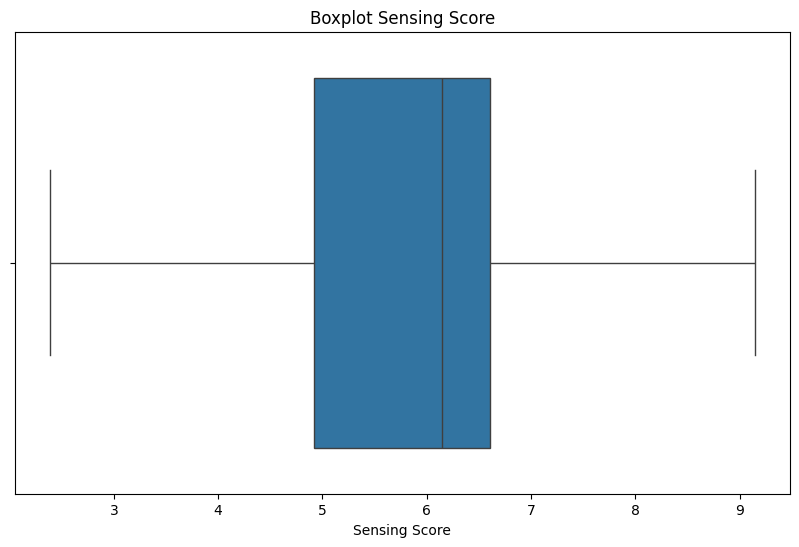

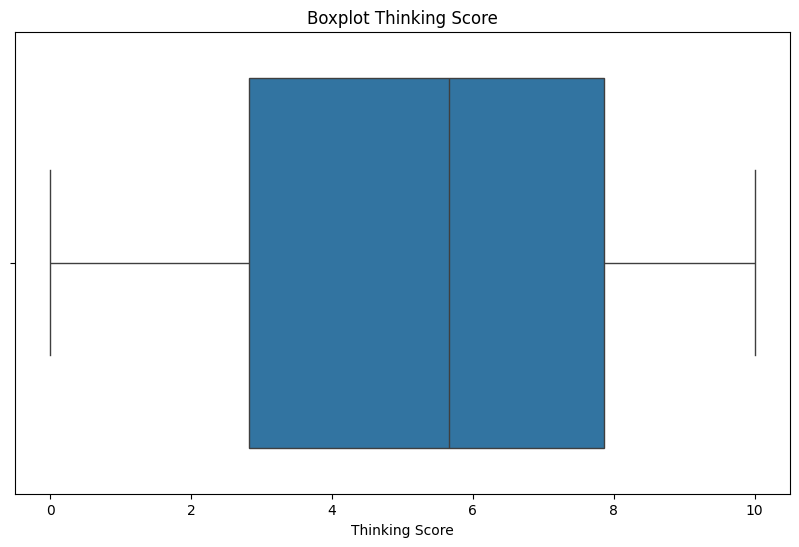

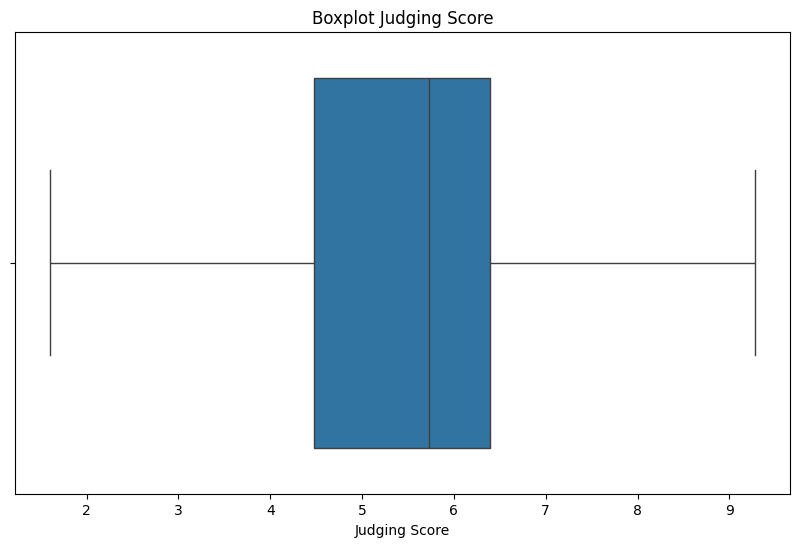

In [19]:
for num in outliers:
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=df_clean, x=num)
  plt.title(f'Boxplot {num}')
  plt.show()

In [20]:
df_clean.shape

(42716, 9)

dari output code diatas dapat diketahui terdapat 9 kolom dan 42716 baris setelah melakukan proses Menangani Duplikat, Missing Value dan Outliers

### Exploratory Data Analysis - Univariate Analysis

In [21]:
numerical_columns = df_clean.select_dtypes(include='number').columns.to_list()
categorical_columns = df_clean.select_dtypes(include='object').columns.to_list()

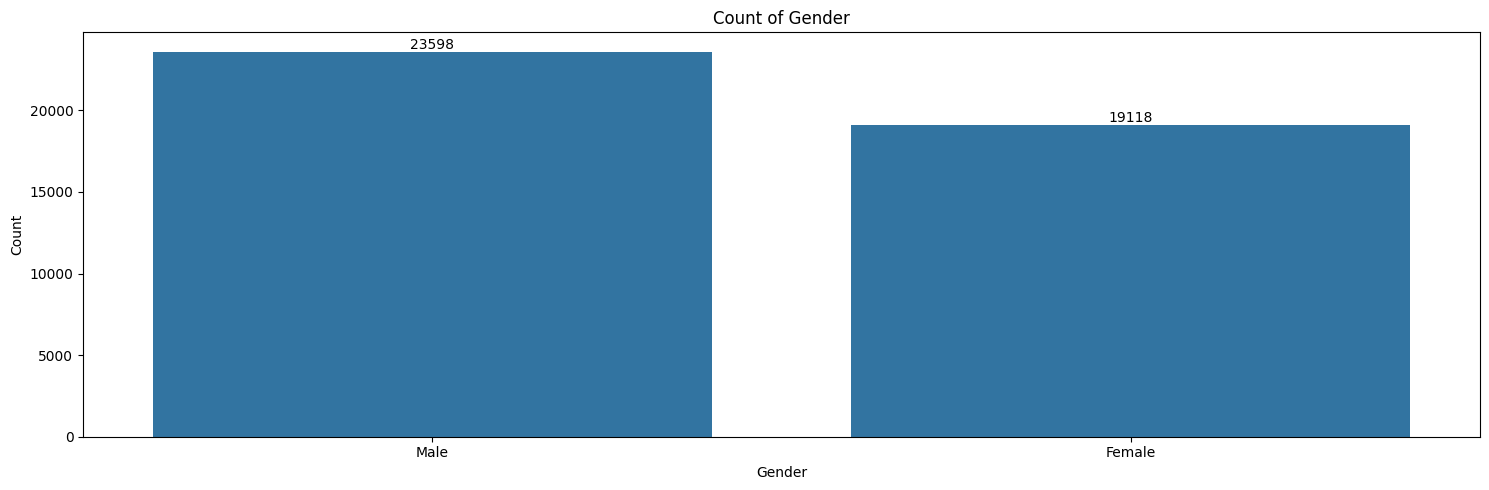

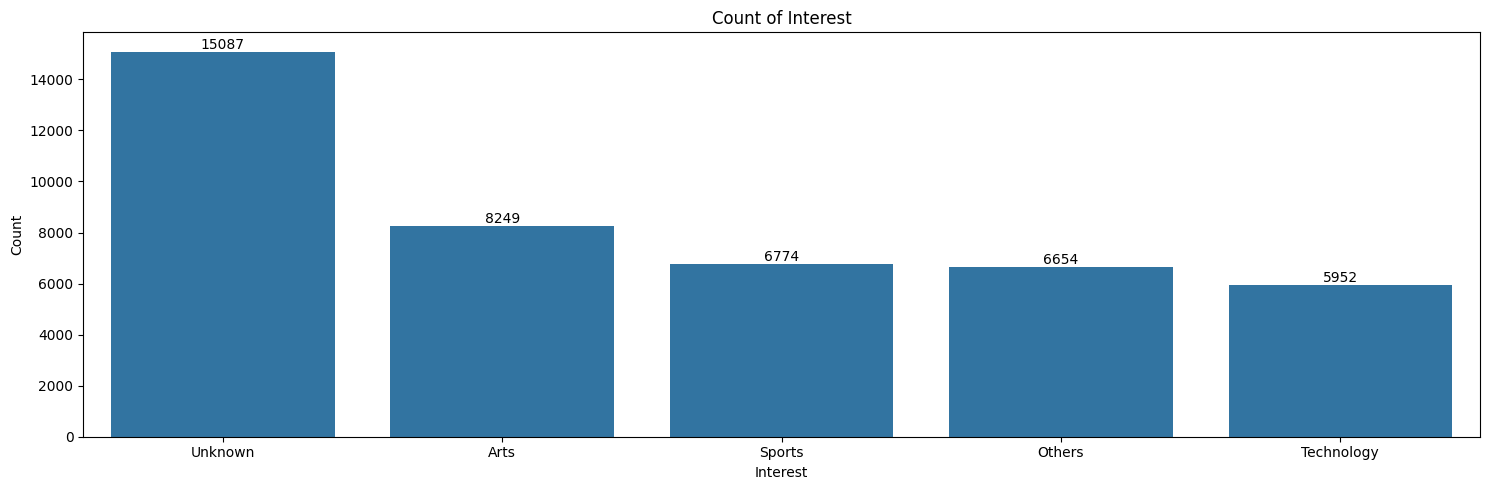

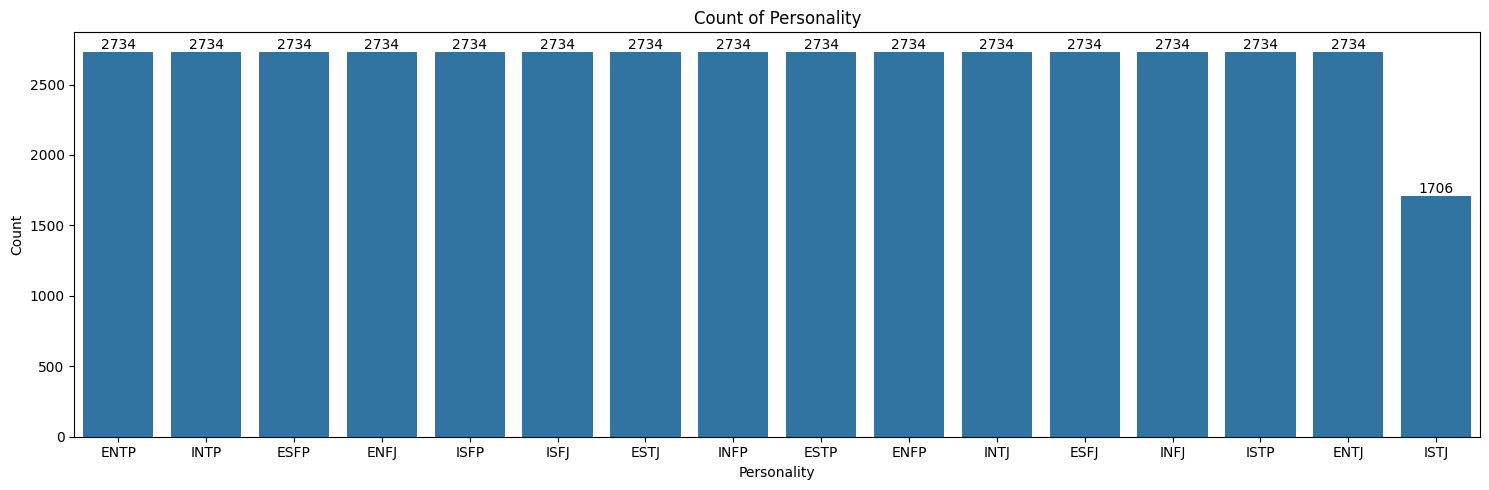

In [22]:
for feature in categorical_columns:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=feature, data=df_clean, order=df_clean[feature].value_counts().index)

    for container in plt.gca().containers:
      plt.gca().bar_label(container)

    plt.title('Count of ' + feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

###**Analisis Kolom Categorical**


##### Gender
Distribusi gender pada dataset menunjukkan bahwa individu didominasi oleh jenis kelamin laki-laki dengan jumlah 23.598 orang, sedangkan individu perempuan berjumlah 19.118 orang.
##### Minat (Interest)
Pada variabel Interest, mayoritas individu tercatat dalam kategori Unknown sebanyak 15.087 orang, yang berarti lebih dari sepertiga data tidak memiliki informasi minat yang jelas. Sementara itu, minat lainnya tersebar pada bidang Arts (8.249), Sports (6.774), Others (6.654), dan Technology (5.952).

##### Tipe Kepribadian (Personality)
Variabel Personality menunjukkan distribusi yang relatif seimbang untuk hampir semua kelas tipe MBTI, dengan masing-masing tipe memiliki 2.734 data poin, kecuali tipe ISTJ, yang hanya berjumlah 1.706 data poin.

###**Analisis Kolom Numerical**

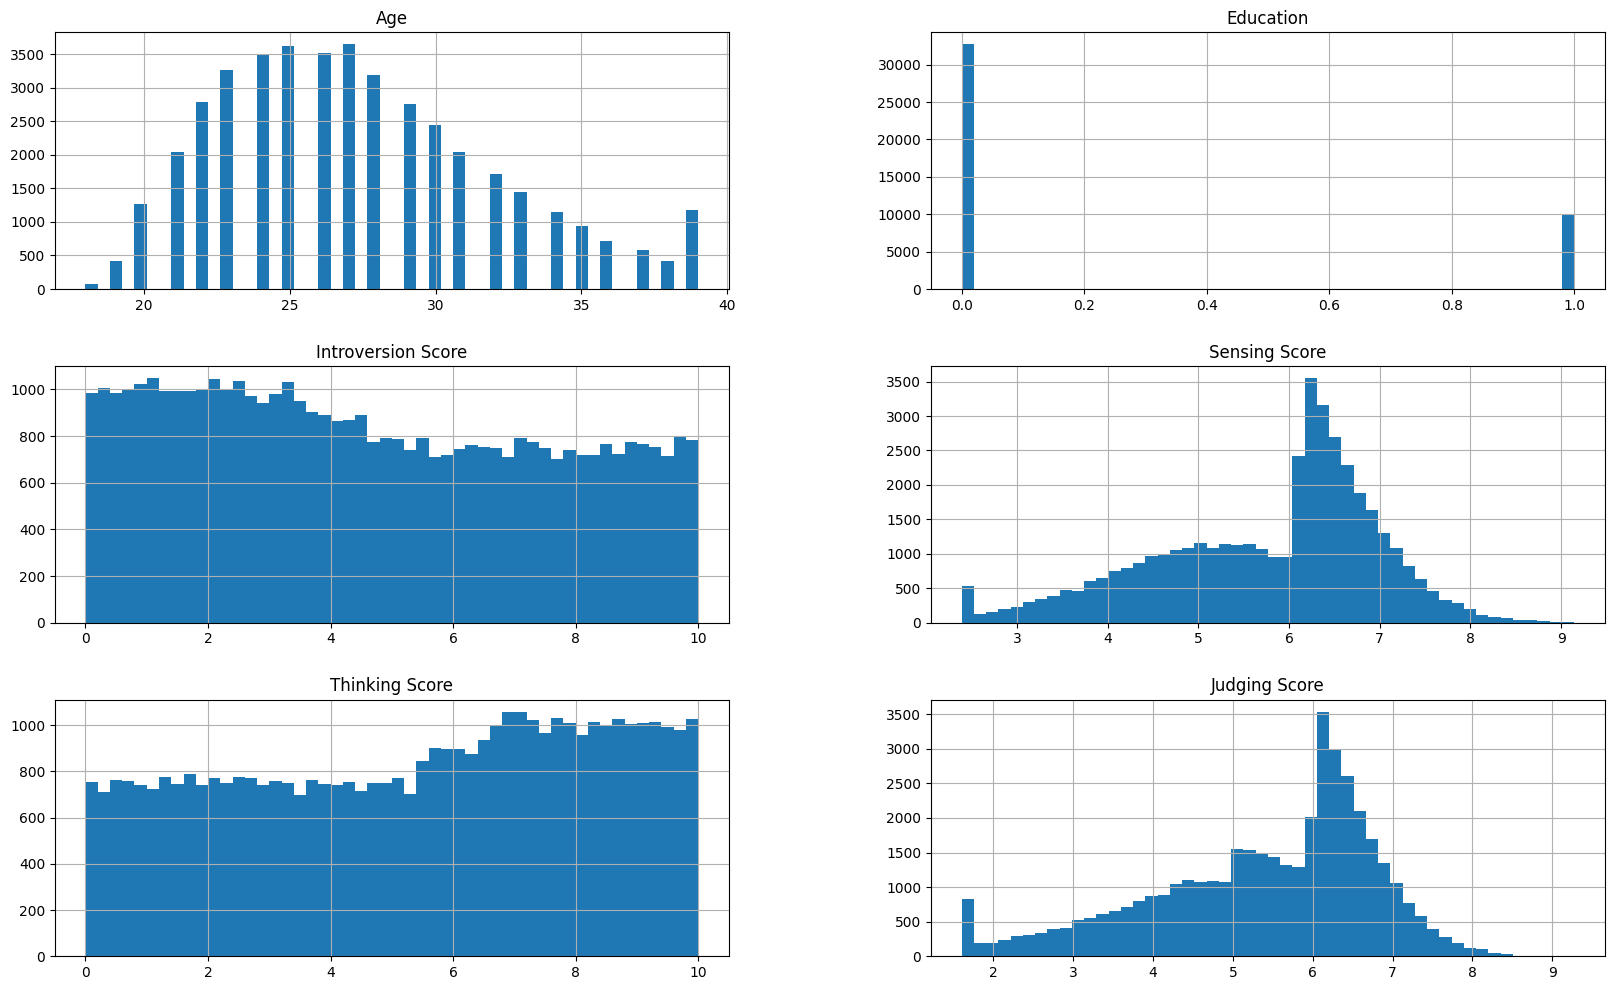

In [44]:
df_clean.hist(bins=50, figsize=(20,12))
plt.show()

##### Usia
Distribusi usia pada dataset menunjukkan bahwa individu didominasi oleh kelompok usia muda, dengan puncak tertinggi pada rentang 24-26 tahun yang mencapai sekitar 3.500+ individu. Distribusi membentuk kurva normal dengan ekor panjang ke kanan, menunjukkan mayoritas individu berusia produktif muda (19-35 tahun) dengan sangat sedikit yang berusia di atas 35 tahun.
##### Pendidikan:
Distribusi pendidikan pada dataset menunjukkan ketimpangan yang sangat ekstrem, dimana hampir seluruh individu memiliki tingkat pendidikan rendah (nilai mendekati 0) dengan jumlah mencapai 33.000+ individu, sedangkan individu berpendidikan tinggi (nilai 1) hanya berjumlah sekitar 10.000 individu. Hal ini mengindikasikan adanya bias pendidikan yang sangat signifikan dalam dataset.

##### Introversion Score
Menunjukkan distribusi yang relatif merata di seluruh spektrum (0-10) dengan slight peak di nilai tengah, mengindikasikan keseimbangan antara individu introvert dan ekstrovert

##### Sensing Score
Didominasi oleh individu dengan preferensi sensing (nilai 6-7) mencapai 3.500+ individu, menunjukkan mayoritas cenderung praktis dan detail-oriented

##### Thinking Score
Distribusi condong ke nilai tinggi (6-10) dengan puncak di nilai 8-10, mengindikasikan mayoritas individu memiliki preferensi pengambilan keputusan berbasis logika
##### Judging Score
Mayoritas individu memiliki preferensi judging (nilai 6-7) dengan jumlah 3.500+ individu, menunjukkan kecenderungan terstruktur dan terencana dalam hidup

### Exploratory Data Analysis - Multivariate Analysis

Categorical Features

In [24]:
num_cols = df_clean.select_dtypes(include='number').columns.tolist()
cat_cols = df_clean.select_dtypes(include='object').columns.tolist()

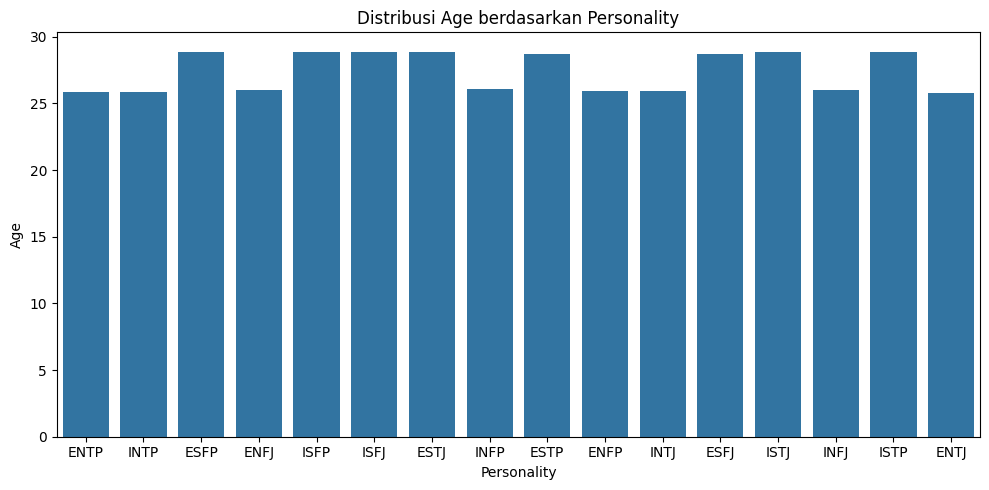

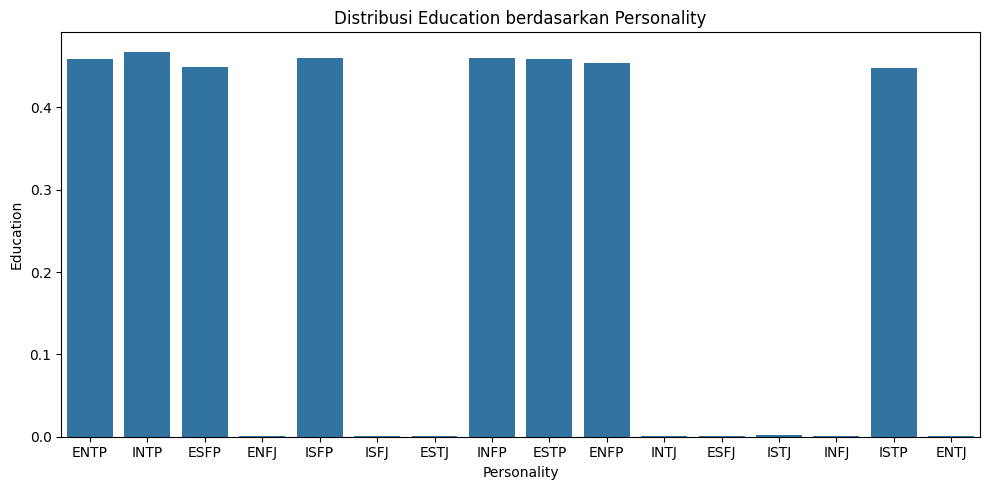

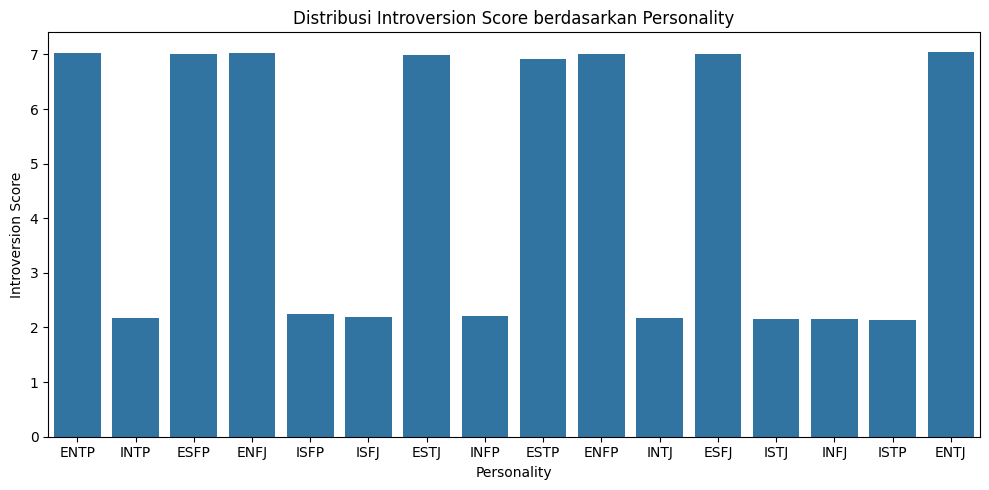

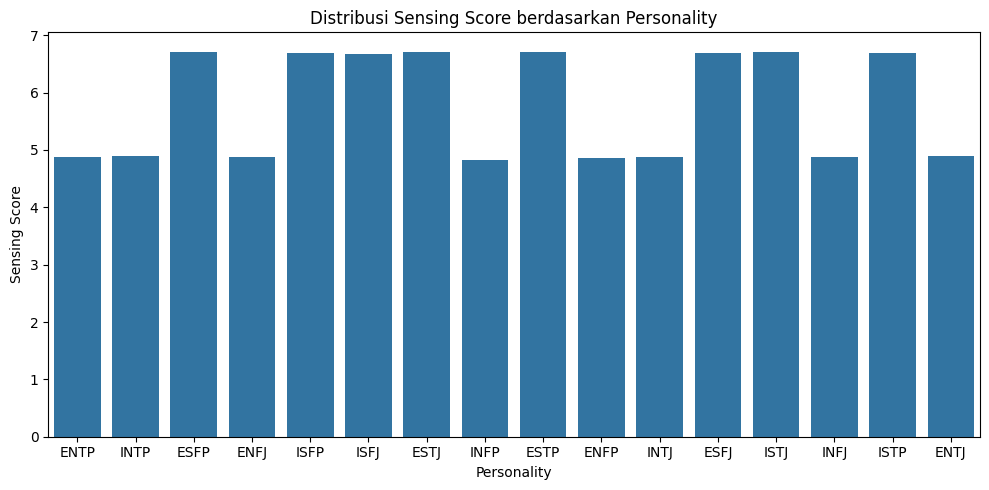

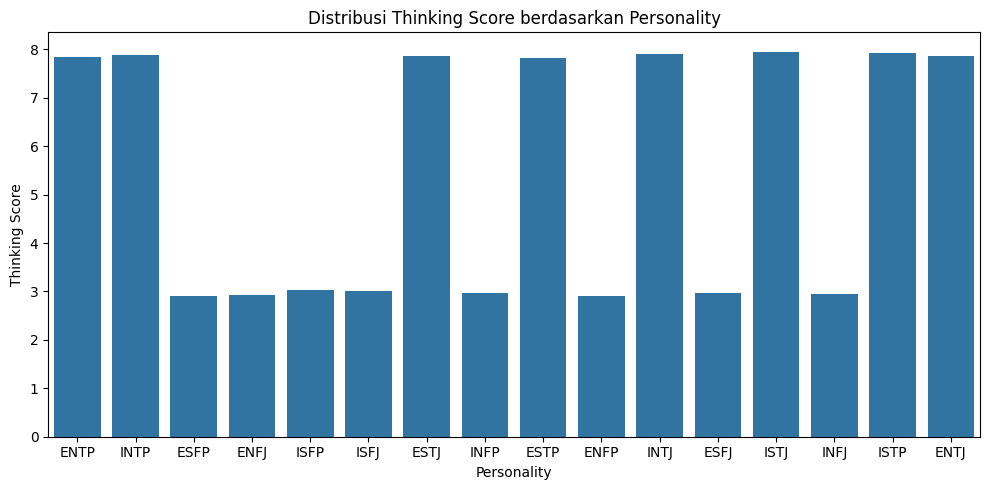

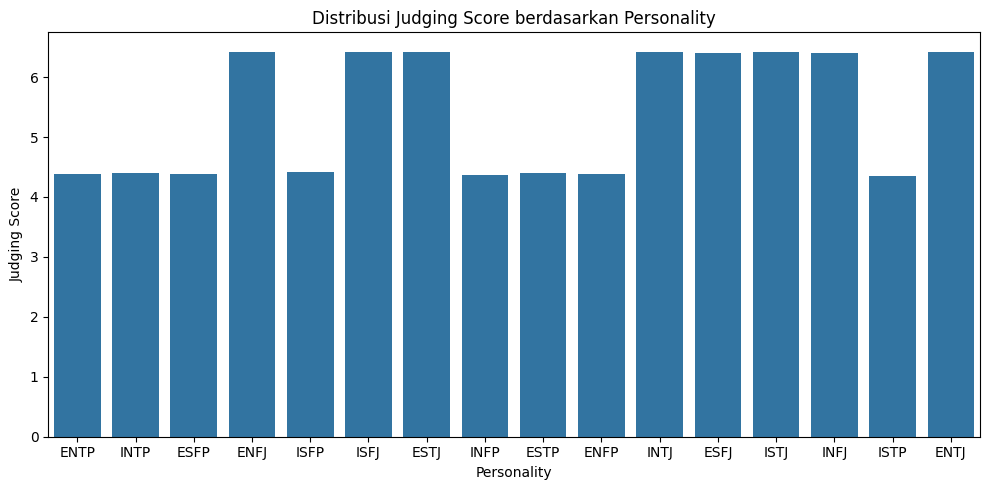

In [54]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.barplot(x='Personality', y=col, data=df_clean, errorbar=None)
    plt.title(f'Distribusi {col} berdasarkan Personality')
    plt.tight_layout()
    plt.show()

##### Usia berdasarkan Personality
Semua tipe kepribadian menunjukkan distribusi usia yang konsisten dengan median 25-29 tahun dan rentang 19-39 tahun. Tipe ISTJ memiliki median tertinggi sekitar 30 tahun, mengindikasikan dataset didominasi dewasa muda di semua kategori kepribadian.
##### Education berdasarkan Personality
Terdapat bias pendidikan ekstrem dimana hanya 8 tipe kepribadian (ENTP, INTP, ESFP, ISFP, INFP, ESTP, ENFP, ISTP) memiliki individu berpendidikan tinggi, sedangkan 8 tipe lainnya seluruhnya berpendidikan rendah.
##### Skor Kepribadian
- Introversion: Tipe Introvert memiliki median 2-3, tipe Ekstrovert median 7-8
- Sensing: Tipe Sensing memiliki median 6-7, tipe Intuitive median 4-5
- Thinking: Tipe Thinking memiliki median 8-9, tipe Feeling median 2-4
- Judging: Tipe Judging memiliki median 6-7, tipe Perceiving median 4-5

**Numerical Feature**

Untuk mengamati hubungan antara fitur numerik, Kita akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

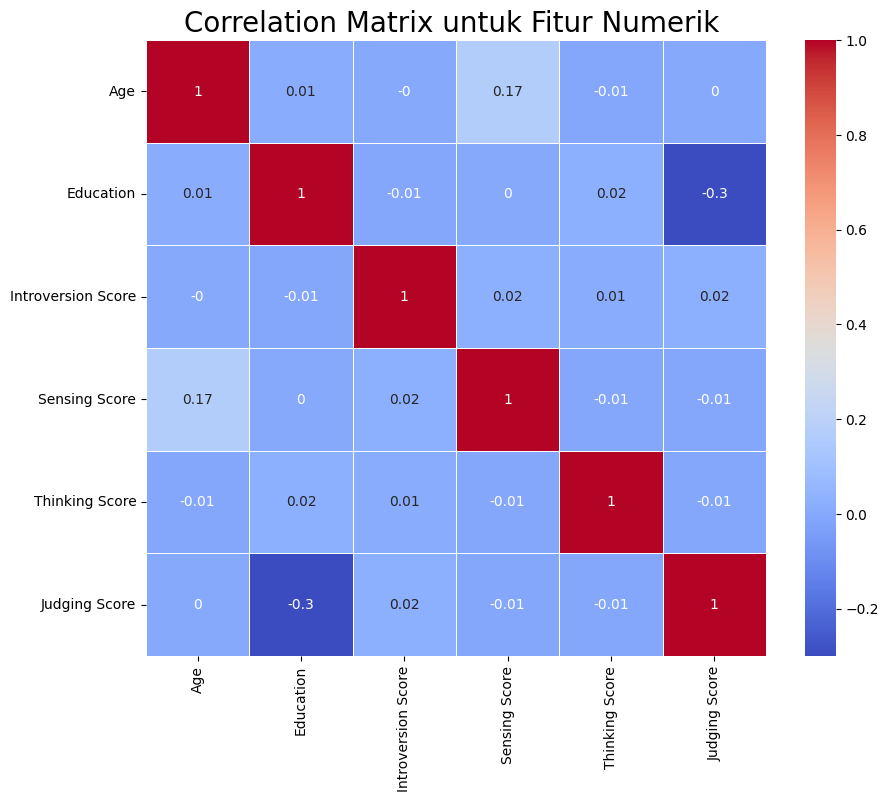

In [28]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numerical_columns].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Berdasarkan correlation matrix untuk fitur numerik, berikut kesimpulan ringkas

Korelasi Antar Variabel:
Matrix menunjukkan korelasi yang sangat lemah antar semua variabel dengan nilai berkisar -0.3 hingga 0.17. Korelasi terkuat adalah:

- Age vs Sensing Score: 0.17 (korelasi positif lemah - individu lebih tua cenderung sedikit lebih sensing)
- Education vs Judging Score: -0.3 (korelasi negatif lemah - individu berpendidikan tinggi cenderung sedikit kurang judging)

Karakteristik Umum:
Mayoritas korelasi berada di rentang -0.02 hingga 0.02, yang menunjukkan tidak ada hubungan linear yang signifikan antar variabel. Hal ini mengindikasikan bahwa:

- Faktor demografis (usia, pendidikan) tidak berpengaruh kuat terhadap skor kepribadian
- Dimensi kepribadian (introversion, sensing, thinking, judging) relatif independen satu sama lain
- Dataset memiliki variabel yang sebagian besar tidak saling berkorelasi, yang baik untuk analisis multivariat

Kesimpulan:
Tidak ada multikolinearitas yang signifikan dalam dataset, memungkinkan penggunaan semua variabel untuk pemodelan tanpa masalah redundansi.

## Data Preparation

In [29]:
df_final = df_clean.copy()

### Encoding Fitur Kategori

In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_final['Gender'] = label_encoder.fit_transform(df_final['Gender'])
df_final['Interest'] = label_encoder.fit_transform(df_final['Interest'])
df_final.head(5)

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,0,1,5.89208,2.388200,7.32363,5.462224,0,ENTP
1,24.0,0,1,2.48366,3.206188,8.06876,3.765012,4,INTP
2,26.0,0,1,7.02910,6.469302,4.16472,5.454442,1,ESFP
3,30.0,1,0,5.46525,4.179244,2.82487,5.080477,2,ENFJ
4,31.0,0,0,3.59804,6.189259,5.31347,3.677984,1,ISFP


Fitur Gender diencoding dengan label encoder

### Train-Test-Split

In [31]:
from sklearn.model_selection import train_test_split

X = df_final.drop(['Personality'], axis=1)
y = df_final['Personality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42 , stratify=y
)

- test_size=0.2 artinya 20% data untuk test, 80% untuk train (bisa diubah sesuai kebutuhan).
- random_state agar pembagian data konsisten/reproducible.
- stratify=y menjaga distribusi label Personality di train dan test tetap proporsional.

In [32]:
print(f'Total of sample in whole dataset: {len(X)}')
print(f'Total of sample in train dataset: {len(X_train)}')
print(f'Total of sample in test dataset: {len(X_test)}')

Total of sample in whole dataset: 42716
Total of sample in train dataset: 34172
Total of sample in test dataset: 8544


In [33]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Standarisasi

In [34]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Age', 'Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

melakukan standarisasi dengan standard scaler

## Model Development

In [36]:
models = pd.DataFrame(index=['train_acc', 'test_acc'], columns=['RandomForest', 'KNN', 'LogReg'])

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report


#Random Forest
RF = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=42, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_acc','RandomForest'] = accuracy_score(y_pred=RF.predict(X_train), y_true=y_train)
models.loc['test_acc','RandomForest'] = accuracy_score(y_pred=RF.predict(X_test), y_true=y_test)

# KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
models.loc['train_acc', 'KNN'] = accuracy_score(y_train, KNN.predict(X_train))
models.loc['test_acc', 'KNN'] = accuracy_score(y_test, KNN.predict(X_test))

# Logistic Regression
LOG = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
LOG.fit(X_train, y_train)
models.loc['train_acc', 'LogReg'] = accuracy_score(y_train, LOG.predict(X_train))
models.loc['test_acc', 'LogReg'] = accuracy_score(y_test, LOG.predict(X_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## Evaluasi Model

In [47]:
print("Model Accuracy Comparison:")
print(models)

Model Accuracy Comparison:
          RandomForest       KNN    LogReg
train_acc      0.99207  0.842649  0.782249
test_acc      0.898759  0.754096  0.784293


- Performa Model pada Training Set:
Random Forest menunjukkan performa terbaik dengan akurasi 99.21%, diikuti KNN dengan 84.26%, dan Logistic Regression dengan 78.22%. Random Forest hampir mencapai akurasi sempurna pada data training.
- Performa Model pada Test Set:
Random Forest tetap mempertahankan posisi terbaik dengan akurasi 89.88%, diikuti Logistic Regression dengan 78.43%, dan KNN dengan 75.41%. Menariknya, Logistic Regression berhasil melampaui KNN pada test set.

In [41]:
model_dict = {'RandomForest': RF, 'KNN': KNN, 'LogReg': LOG}
prediksi = X_test.iloc[:10].copy()

# Buat dictionary untuk hasil prediksi
pred_dict = {'y_true': y_test[:10].tolist()}

# Iterasi melalui dictionary model dan lakukan prediksi
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).tolist()

pd.DataFrame(pred_dict)

,y_true,prediksi_RandomForest,prediksi_KNN,prediksi_LogReg
0,INFP,INFP,INFP,INFP
1,ISTP,ISTP,ISTP,ISTP
2,INTJ,INTJ,INTJ,INTJ
3,ENFJ,ENFJ,ENFJ,ENFJ
4,INTJ,INTJ,INTJ,ISTJ
5,ESTJ,ESTJ,ESTJ,ESTJ
6,ISTP,ISTP,ISTJ,ISTJ
7,ENTP,ENTP,ENTP,ENTP
8,ENTJ,ENTJ,ENTJ,ENTJ
9,INFJ,INFJ,INFJ,INFJ


dari prediksi yang dilakukan dapat diketahui bahwa model Random Forest merupakan model terbaik digunakan untuk klasifikasi personal type karena mampu mengklasifikasi dengan lebih baik dibanding dengan model lainnya